#Tarea 9.4
Calcule la siguiente integral

$$
\int_{0.1}^1 dx\,\frac{\ln(x)}{\sqrt{\cos^2(x) + \tanh(x)}}
$$

Hágalo usando la cuadratura adaptativa y el integrador de scipy. Grafique los tiempos que tardan ambos en función de la precisión pedida.

In [55]:
import numpy as np
from scipy import integrate
import time
import matplotlib.pyplot as plt
#función a integrar
f = lambda x: np.log(x) / np.sqrt(np.cos(x)**2 + np.tanh(x))

In [56]:
class MaxIterations(Exception): #definimos la clase para crear un error
    pass

def adaptive(f, a, b, tol, N=100000):
    '''Calcula la integral con el método de la cuadartura adaptativa de la función dada f, en un intervalo [a,b]
    con una tolerancia dada en una cierta cantidad de pasos, si en N pasos no llega resultado no podrá calcular la integral.
    f: función
    a,b : límites de integración. Números int o float.
    tol: toleracia de error absoluto, número int o float
    N : número de pasos máximos (opcional)'''

    # Variables iniciales
    approx = 0
    i = 0
    toli = [10*tol]
    ai = [a]
    hi = [(b - a)/2]
    fai = [f(a)]
    fbi = [f(b)]
    fci = [f(a + hi[i])]
    S0i = [hi[i]*(fai[i] + 4*fci[i] + fbi[i])/3]
    Li = [1]



    while i >= 0:

        fd = f(ai[i] + hi[i]/2)
        fe = f(ai[i] + 3*hi[i]/2)
        S1 = hi[i]*(fai[i] + 4*fd + fci[i])/6
        S2 = hi[i]*(fci[i] + 4*fe + fbi[i])/6
        ai_prec = ai[i]
        hi_prec = hi[i]
        fai_prec = fai[i]
        fbi_prec = fbi[i]
        fci_prec = fci[i]
        toli_prec = toli[i]
        S0i_prec = S0i[i]
        Li_prec = Li[i]

        i -= 1
        if abs(S1 + S2 - S0i_prec) < toli_prec:
            approx += S1 + S2
        else:
            if Li_prec >= N:
                raise MaxIterations("Alcanzado máximo número de iteraciones.")

            # Intervalo derecho
            i += 1
            if i >= len(ai): # A veces hay que ampliar la lista
                ai.append(ai_prec + hi_prec)
                fai.append(fci_prec)
                fci.append(fe)
                fbi.append(fbi_prec)
                hi.append(hi_prec/2)
                toli.append(toli_prec/2)
                S0i.append(S2)
                Li.append(Li_prec + 1)
            else:
                ai[i] = ai_prec + hi_prec
                fai[i] = fci_prec
                fci[i] = fe
                fbi[i] = fbi_prec
                hi[i] = hi_prec/2
                toli[i] = toli_prec/2
                S0i[i] = S2
                Li[i] = Li_prec + 1

            # Intervalo izquierdo
            i += 1
            if i >= len(ai):
                ai.append(ai_prec)
                fai.append(fai_prec)
                fci.append(fd)
                fbi.append(fci_prec)
                hi.append(hi[i-1])
                toli.append(toli[i-1])
                S0i.append(S1)
                Li.append(Li[i-1])
            else:
                ai[i] = ai_prec
                fai[i] = fai_prec
                fci[i] = fd
                fbi[i] = fci_prec
                hi[i] = hi[i-1]
                toli[i] = toli[i-1]
                S0i[i] = S1
                Li[i] = Li[i-1]

    return approx

In [57]:
adaptive(f, 0.1, 1, 0.0001) #integral con método adaptativo de la función con una precisión

-0.616949933560747

In [58]:
integrate.quad(f, 0.1, 1, epsabs=0.0001) #integral con scipy de la función con la misma precisión

(-0.6169301768810298, 1.5319008842176826e-07)

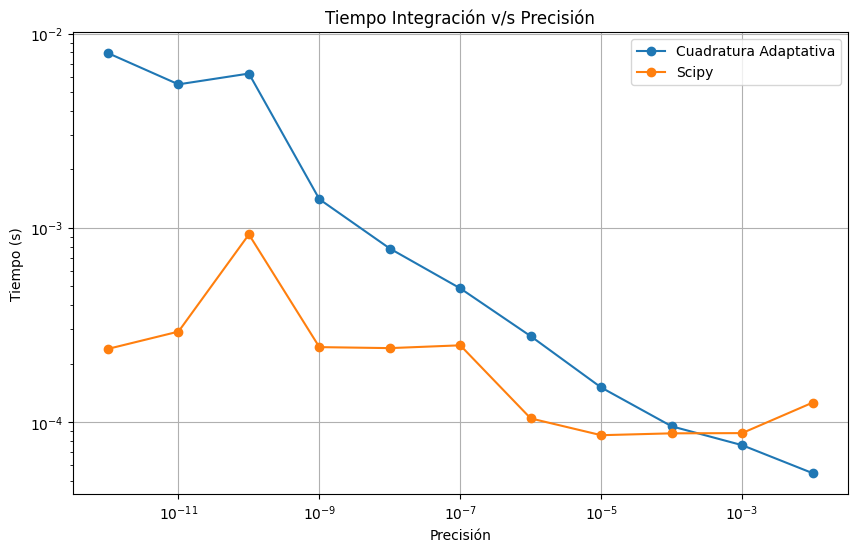

In [65]:

# precisiones a usar
precisiones = np.logspace(-2, -12, 11)

# Tiempos de cuadratura adaptativa y scipy para cada precisión
t_adaptiva = []
t_scipy = []

for precision in precisiones:
    # Cuadratura adaptativa
    start = time.time()
    result = adaptive(f, 0.1, 1, precision)
    end= time.time()
    t_adaptiva.append(end - start)

    # Integrador de scipy
    inicio = time.time()
    integrate.quad(f, 0.1, 1, epsabs=precision)
    #usamos el epsabs ya que en la cuadratura adaptativa la tolerancia es un error absoluto
    fin = time.time()
    t_scipy.append(fin - inicio)

# Graficar los tiempos en función de la precisión
plt.figure(figsize=(10, 6))
plt.loglog(precisiones, t_adaptiva, marker='o', label='Cuadratura Adaptativa')
plt.loglog(precisiones, t_scipy, marker='o', label='Scipy')
plt.title('Tiempo Integración v/s Precisión')
plt.xlabel('Precisión')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.grid(True)
plt.show()